# Eigenfaces

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
import os

## PCA function

In [2]:
def pca(image_data, components = 2): # n_features, n_samples
    # mean and covariance matrix
    mu = np.mean(image_data, axis = 1).reshape(-1,1)
    xc = image_data - mu
    cov = xc.dot(xc.T) / len(image_data.T)

    # largest eigenvalues and corresponding eigenvectors
    k = components
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    lam, w = eigenvalues[-k:][::-1], eigenvectors[:, -k:][:,::-1]

    return mu, w

## Load Data

In [3]:
# read data and reduce resolution
data_dir = "data/yalefaces/"
files = os.listdir(data_dir)

sub1_images = [Image.open(data_dir + f) for f in files if 'subject01' in f and 'test' not in f]
sub2_images = [Image.open(data_dir + f) for f in files if 'subject02' in f and 'test' not in f]

sub1_images = [np.array(img.resize((np.array(img.size) / 4).astype(int)), np.int) for img in sub1_images]
sub2_images = [np.array(img.resize((np.array(img.size) / 4).astype(int)), np.int) for img in sub2_images]

sub1 = np.array(sub1_images).reshape((len(sub1_images), -1))
sub2 = np.array(sub2_images).reshape((len(sub2_images), -1))

## Run PCA

In [4]:
# pca
h, w = sub1_images[0].shape
k = 6
mu1, sub1_pcs = pca(sub1.T, components = k)
sub1_eigenfaces = sub1_pcs.reshape((h, w, k))

mu2, sub2_pcs = pca(sub2.T, components = k)
sub2_eigenfaces = sub2_pcs.reshape((h, w, k))

## Plots

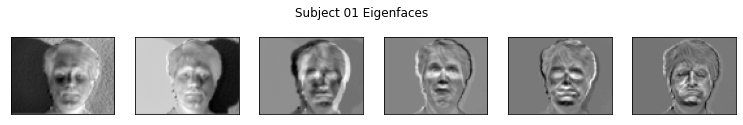

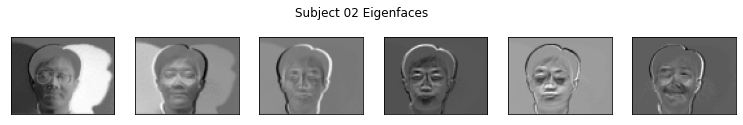

In [5]:
# plot eigenfaces of sub1
plt.figure(figsize = (13, 2))
for t in range(k):
    plt.subplot(161 + t)
    plt.imshow(sub1_eigenfaces[:,:,t], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Subject 01 Eigenfaces")
plt.show()

# plot eigenfaces of sub2
plt.figure(figsize = (13, 2))
for t in range(k):
    plt.subplot(161 + t)
    plt.imshow(sub2_eigenfaces[:,:,t], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Subject 02 Eigenfaces")
plt.show()

## Face recognition

In [6]:
# read test data
sub1_test, sub2_test = Image.open(data_dir + "subject01-test.gif"), Image.open(data_dir + "subject02-test.gif")

sub1_test = np.array(sub1_test.resize((np.array(sub1_test.size) / 4).astype(int)), np.int).reshape((1, -1))
sub2_test = np.array(sub2_test.resize((np.array(sub2_test.size) / 4).astype(int)), np.int).reshape((1, -1))

In [7]:
# cosine similarity
sub1_top_pc, sub2_top_pc = sub1_pcs[:,0].reshape((1,-1)), sub2_pcs[:,0].reshape((1,-1))

s11 = np.inner(sub1_top_pc, sub1_test) / (np.linalg.norm(sub1_top_pc) * np.linalg.norm(sub1_test))
s12 = np.inner(sub1_top_pc, sub2_test) / (np.linalg.norm(sub1_top_pc) * np.linalg.norm(sub2_test))

s21 = np.inner(sub2_top_pc, sub1_test) / (np.linalg.norm(sub2_top_pc) * np.linalg.norm(sub1_test))
s22 = np.inner(sub2_top_pc, sub2_test) / (np.linalg.norm(sub2_top_pc) * np.linalg.norm(sub2_test))

print("Cosine Similarity - S11: %.2f, S12: %.2f, S21: %.2f, S22: %.2f" % (s11,s12,s21,s22))

Cosine Similarity - S11: -0.88, S12: -0.70, S21: 0.09, S22: 0.42


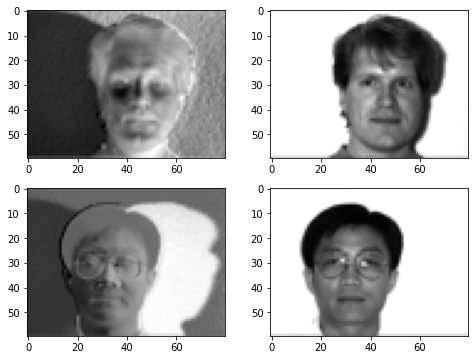

In [8]:
# plots
plt.figure(figsize = (8,6))
plt.subplot(221)
plt.imshow(sub1_eigenfaces[:,:,0], cmap = 'gray')
plt.subplot(222)
plt.imshow(sub1_test.reshape((h,w)), cmap = 'gray')
plt.subplot(223)
plt.imshow(sub2_eigenfaces[:,:,0], cmap = 'gray')
plt.subplot(224)
plt.imshow(sub2_test.reshape((h,w)), cmap = 'gray')
plt.show()